In [72]:
data(infert)
str(infert)

'data.frame':	248 obs. of  8 variables:
 $ education     : Factor w/ 3 levels "0-5yrs","6-11yrs",..: 1 1 1 1 2 2 2 2 2 2 ...
 $ age           : num  26 42 39 34 35 36 23 32 21 28 ...
 $ parity        : num  6 1 6 4 3 4 1 2 1 2 ...
 $ induced       : num  1 1 2 2 1 2 0 0 0 0 ...
 $ case          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ spontaneous   : num  2 0 0 0 1 1 0 0 1 0 ...
 $ stratum       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ pooled.stratum: num  3 1 4 2 32 36 6 22 5 19 ...


In [73]:
summary(infert)

   education        age            parity         induced      
 0-5yrs : 12   Min.   :21.00   Min.   :1.000   Min.   :0.0000  
 6-11yrs:120   1st Qu.:28.00   1st Qu.:1.000   1st Qu.:0.0000  
 12+ yrs:116   Median :31.00   Median :2.000   Median :0.0000  
               Mean   :31.50   Mean   :2.093   Mean   :0.5726  
               3rd Qu.:35.25   3rd Qu.:3.000   3rd Qu.:1.0000  
               Max.   :44.00   Max.   :6.000   Max.   :2.0000  
      case         spontaneous        stratum      pooled.stratum 
 Min.   :0.0000   Min.   :0.0000   Min.   : 1.00   Min.   : 1.00  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:21.00   1st Qu.:19.00  
 Median :0.0000   Median :0.0000   Median :42.00   Median :36.00  
 Mean   :0.3347   Mean   :0.5766   Mean   :41.87   Mean   :33.58  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:62.25   3rd Qu.:48.25  
 Max.   :1.0000   Max.   :2.0000   Max.   :83.00   Max.   :63.00  

In [74]:
head(infert)

education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0-5yrs,26,6,1,1,2,1,3
0-5yrs,42,1,1,1,0,2,1
0-5yrs,39,6,2,1,0,3,4
0-5yrs,34,4,2,1,0,4,2
6-11yrs,35,3,1,1,1,5,32
6-11yrs,36,4,2,1,1,6,36


In [75]:
library('data.table')

In [76]:
DT <- as.data.table(infert)

In [77]:
print(DT)
#Explanation from https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/infert.html
# 1.	Education	0 = 0-5 years
# 1 = 6-11 years
# 2 = 12+ years
# 2.	age	age in years of case
# 3.	parity	count number of births that a woman has had after 20 weeks gestation
# 4.	number of prior	0 = 0
# induced abortions	1 = 1
# 2 = 2 or more
# 5.	case status	1 = case
# 0 = control
# 6.	number of prior	0 = 0
# spontaneous abortions	1 = 1
# 2 = 2 or moref
# 7.	matched set number	1-83
# 8.	stratum number	1-63

     education age parity induced case spontaneous stratum pooled.stratum
  1:    0-5yrs  26      6       1    1           2       1              3
  2:    0-5yrs  42      1       1    1           0       2              1
  3:    0-5yrs  39      6       2    1           0       3              4
  4:    0-5yrs  34      4       2    1           0       4              2
  5:   6-11yrs  35      3       1    1           1       5             32
 ---                                                                     
244:   12+ yrs  31      1       0    0           1      79             45
245:   12+ yrs  34      1       0    0           0      80             47
246:   12+ yrs  35      2       2    0           0      81             54
247:   12+ yrs  29      1       0    0           1      82             43
248:   12+ yrs  23      1       0    0           1      83             40


In [78]:
DT[,mean(induced), by=education]

education,V1
0-5yrs,1.166667
6-11yrs,0.475000
12+ yrs,0.612069


In [162]:
DT[,mean(induced),by=substring(age, 1, 1)]
#Mean number of induced abortions for case ages in 20's, 40's, and 30's 

substring,V1
2,0.6862745
4,0.2222222
3,0.5312500


In [165]:
DT[,.N, by = 10*round(age/10)]

round,N
30,138
40,80
20,30


In [167]:
DT[,.N, by = (induced+spontaneous)]

induced,N
3,15
1,92
2,74
0,67


In [133]:
gt2<-infert$parity>2
table(infert$education,gt2)

         gt2
          FALSE TRUE
  0-5yrs      3    9
  6-11yrs    84   36
  12+ yrs    93   23

In [168]:
DT[,.(Ind=median(induced),
      Spon=median(spontaneous),
      Age=median(age),
      Parity=median(parity)),by=education][order(education)]


education,Ind,Spon,Age,Parity
0-5yrs,1.5,0,36.5,5
6-11yrs,0.0,0,33.0,2
12+ yrs,0.0,0,29.0,2


In [132]:
DT[,.(Ind=mean(induced),
      Spon=mean(spontaneous),
      Age=mean(age),
      Parity=mean(parity)),by=education][order(education)]


education,Ind,Spon,Age,Parity
0-5yrs,1.166667,0.4166667,35.25000,4.250000
6-11yrs,0.475000,0.5416667,32.85000,2.100000
12+ yrs,0.612069,0.6293103,29.72414,1.862069


In [95]:
#Subset of the dataset with the mean for each column arranged by education legth
DT[, lapply(.SD, mean), by=education]

education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0-5yrs,35.25000,4.250000,1.166667,0.3333333,0.4166667,2.50000,2.50000
6-11yrs,32.85000,2.100000,0.475000,0.3333333,0.5416667,24.50000,21.42500
12+ yrs,29.72414,1.862069,0.612069,0.3362069,0.6293103,63.91379,49.37069


In [96]:
#subset of the dataset with the max for each column arranged by education length
DT[, lapply(.SD, max), by=education]
#Note that for induced and spontaneous abortions, 2 has been defined as any number greater to or equal to 2/
#So the max data isn't very interesting...

education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0-5yrs,42,6,2,1,2,4,4
6-11yrs,44,5,2,1,2,44,38
12+ yrs,38,6,2,1,2,83,63


In [130]:
#Case = 0 means that it is a control case and Case=1 means that it is part of the case. 
#In the data set, are the ages of cases significantly different than the ages of the control group?

t.test(subset(infert$age,infert$case == 0),
+ subset(infert$age,infert$case == 1))


	Welch Two Sample t-test

data:  subset(infert$age, infert$case == 0) and +subset(infert$age, infert$case == 1)
t = -0.055288, df = 163.77, p-value = 0.956
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.439600  1.361177
sample estimates:
mean of x mean of y 
 31.49091  31.53012 


In [ ]:
#The p-value is very high, showing that the age groups are not statistically different. 
#We also see that the means of the control group and the case group are very similar at about 31.5 years

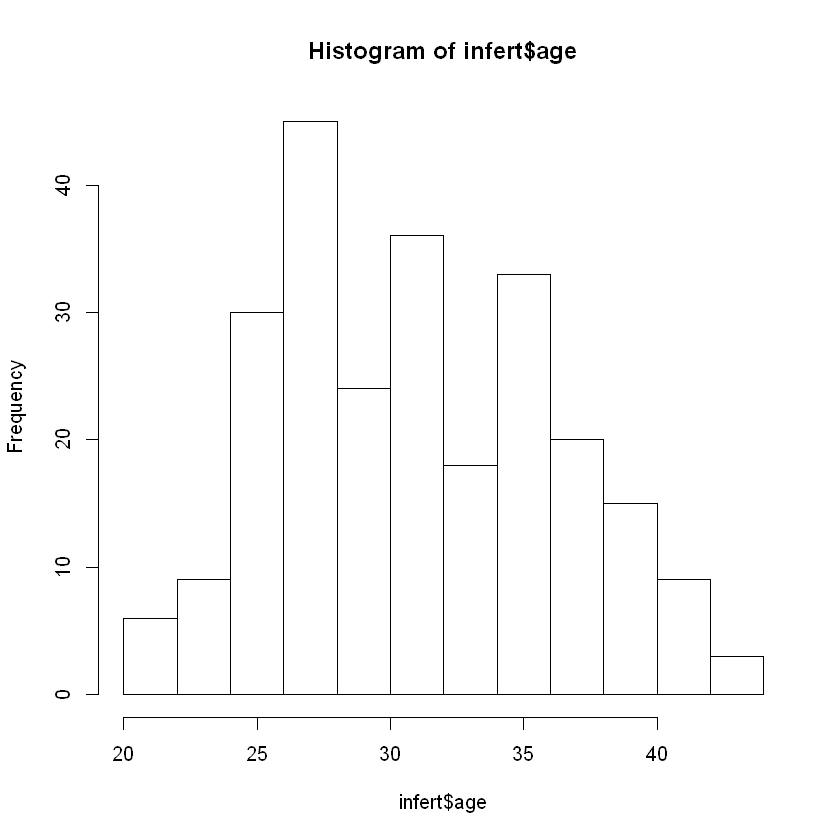

In [122]:
hist(infert$age, breaks=10)
#I'm curious what a histogram of the case ages looks like

In [149]:
infert3<-infert[induced+spontaneous>2] #show cases where they have definitely had 3 or more abortions

In [150]:
summary(infert3)

   education      age            parity         induced           case       
 0-5yrs :1   Min.   :24.00   Min.   :3.000   Min.   :1.000   Min.   :0.0000  
 6-11yrs:8   1st Qu.:26.50   1st Qu.:3.000   1st Qu.:1.000   1st Qu.:0.0000  
 12+ yrs:6   Median :28.00   Median :4.000   Median :2.000   Median :1.0000  
             Mean   :29.93   Mean   :4.067   Mean   :1.533   Mean   :0.6667  
             3rd Qu.:35.00   3rd Qu.:5.000   3rd Qu.:2.000   3rd Qu.:1.0000  
             Max.   :37.00   Max.   :6.000   Max.   :2.000   Max.   :1.0000  
  spontaneous       stratum      pooled.stratum 
 Min.   :1.000   Min.   : 1.00   Min.   : 3.00  
 1st Qu.:1.000   1st Qu.:17.00   1st Qu.:34.00  
 Median :1.000   Median :29.00   Median :38.00  
 Mean   :1.467   Mean   :32.67   Mean   :42.27  
 3rd Qu.:2.000   3rd Qu.:51.00   3rd Qu.:57.00  
 Max.   :2.000   Max.   :68.00   Max.   :62.00  

In [155]:
infert1<-infert[induced+spontaneous<2]
summary(infert1)

   education       age            parity         induced           case       
 0-5yrs : 4   Min.   :21.00   Min.   :1.000   Min.   :0.000   Min.   :0.0000  
 6-11yrs:80   1st Qu.:28.00   1st Qu.:1.000   1st Qu.:0.000   1st Qu.:0.0000  
 12+ yrs:75   Median :31.00   Median :1.000   Median :0.000   Median :0.0000  
              Mean   :31.62   Mean   :1.472   Mean   :0.283   Mean   :0.2579  
              3rd Qu.:35.50   3rd Qu.:2.000   3rd Qu.:1.000   3rd Qu.:1.0000  
              Max.   :44.00   Max.   :4.000   Max.   :1.000   Max.   :1.0000  
  spontaneous        stratum      pooled.stratum 
 Min.   :0.0000   Min.   : 2.00   Min.   : 1.00  
 1st Qu.:0.0000   1st Qu.:22.50   1st Qu.:15.50  
 Median :0.0000   Median :43.00   Median :31.00  
 Mean   :0.2956   Mean   :43.71   Mean   :30.53  
 3rd Qu.:1.0000   3rd Qu.:65.00   3rd Qu.:45.00  
 Max.   :1.0000   Max.   :83.00   Max.   :60.00  

In [156]:
t.test((infert1$parity),
+ (infert3$parity))


	Welch Two Sample t-test

data:  (infert1$parity) and +(infert3$parity)
t = -10.216, df = 15.361, p-value = 3.009e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.135259 -2.054678
sample estimates:
mean of x mean of y 
 1.471698  4.066667 


In [151]:
#A table with only women who have a highschool education or greater
infert=as.data.table(infert)
DT1<-infert[education=="12+ yrs"]
head(DT1)

education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
12+ yrs,30,1,0,1,0,45,44
12+ yrs,37,1,1,1,0,46,48
12+ yrs,28,2,0,1,2,47,51
12+ yrs,27,4,2,1,0,48,61
12+ yrs,26,2,2,1,0,49,49
12+ yrs,38,3,0,1,2,50,60


In [143]:
summary(DT1)

   education        age            parity         induced      
 0-5yrs :  0   Min.   :21.00   Min.   :1.000   Min.   :0.0000  
 6-11yrs:  0   1st Qu.:26.00   1st Qu.:1.000   1st Qu.:0.0000  
 12+ yrs:116   Median :29.00   Median :2.000   Median :0.0000  
               Mean   :29.72   Mean   :1.862   Mean   :0.6121  
               3rd Qu.:32.50   3rd Qu.:2.000   3rd Qu.:1.0000  
               Max.   :38.00   Max.   :6.000   Max.   :2.0000  
      case         spontaneous        stratum      pooled.stratum 
 Min.   :0.0000   Min.   :0.0000   Min.   :45.00   Min.   :39.00  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:54.00   1st Qu.:44.00  
 Median :0.0000   Median :0.0000   Median :64.00   Median :49.00  
 Mean   :0.3362   Mean   :0.6293   Mean   :63.91   Mean   :49.37  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:73.25   3rd Qu.:54.00  
 Max.   :1.0000   Max.   :2.0000   Max.   :83.00   Max.   :63.00  

In [105]:
#Make a table with everyone with less than 12 years of education
DT2 <- infert[education %in% c("0-5yrs","6-11yrs")]
head(DT2)

education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0-5yrs,26,6,1,1,2,1,3
0-5yrs,42,1,1,1,0,2,1
0-5yrs,39,6,2,1,0,3,4
0-5yrs,34,4,2,1,0,4,2
6-11yrs,35,3,1,1,1,5,32
6-11yrs,36,4,2,1,1,6,36


In [107]:
tail(DT2)

education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
6-11yrs,30,3,0,0,1,39,30
6-11yrs,28,1,0,0,0,40,8
6-11yrs,39,3,0,0,0,41,33
6-11yrs,35,1,0,0,0,42,11
6-11yrs,41,1,0,0,0,43,15
6-11yrs,37,2,0,0,0,44,25


In [145]:
summary(DT2)

   education        age            parity         induced      
 0-5yrs : 12   Min.   :21.00   Min.   :1.000   Min.   :0.0000  
 6-11yrs:120   1st Qu.:28.75   1st Qu.:1.000   1st Qu.:0.0000  
 12+ yrs:  0   Median :34.00   Median :2.000   Median :0.0000  
               Mean   :33.07   Mean   :2.295   Mean   :0.5379  
               3rd Qu.:37.00   3rd Qu.:3.000   3rd Qu.:1.0000  
               Max.   :44.00   Max.   :6.000   Max.   :2.0000  
      case         spontaneous        stratum      pooled.stratum 
 Min.   :0.0000   Min.   :0.0000   Min.   : 1.00   Min.   : 1.00  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:11.75   1st Qu.:11.75  
 Median :0.0000   Median :0.0000   Median :22.50   Median :19.50  
 Mean   :0.3333   Mean   :0.5303   Mean   :22.50   Mean   :19.70  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:33.25   3rd Qu.:28.25  
 Max.   :1.0000   Max.   :2.0000   Max.   :44.00   Max.   :38.00  

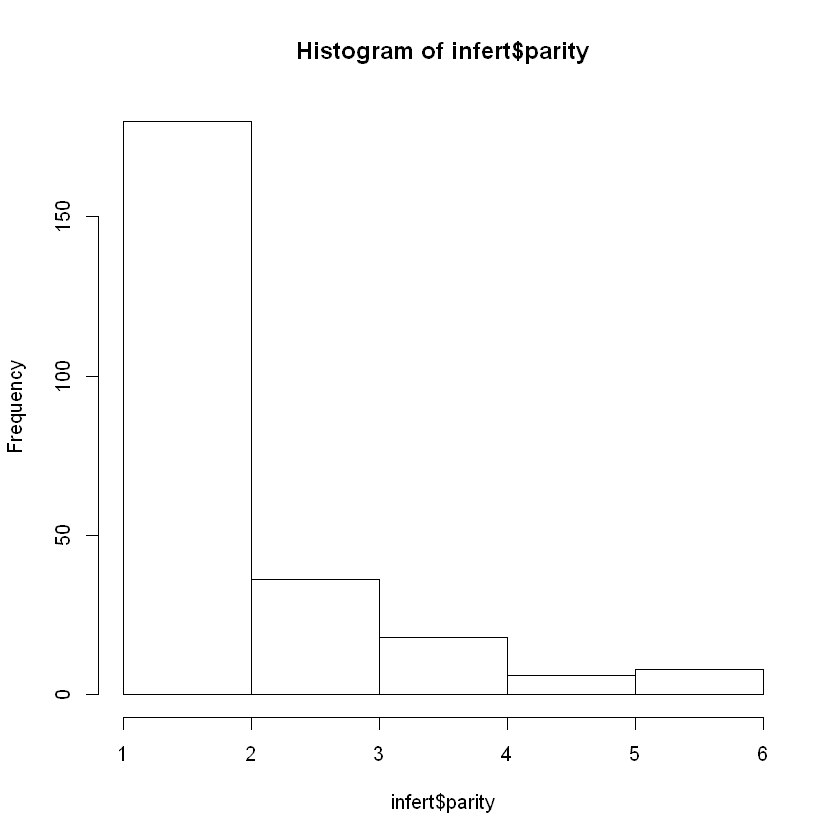

In [142]:
hist(infert$parity, breaks=6)
#Parity is the number of pregancies the women in the study carried out to term

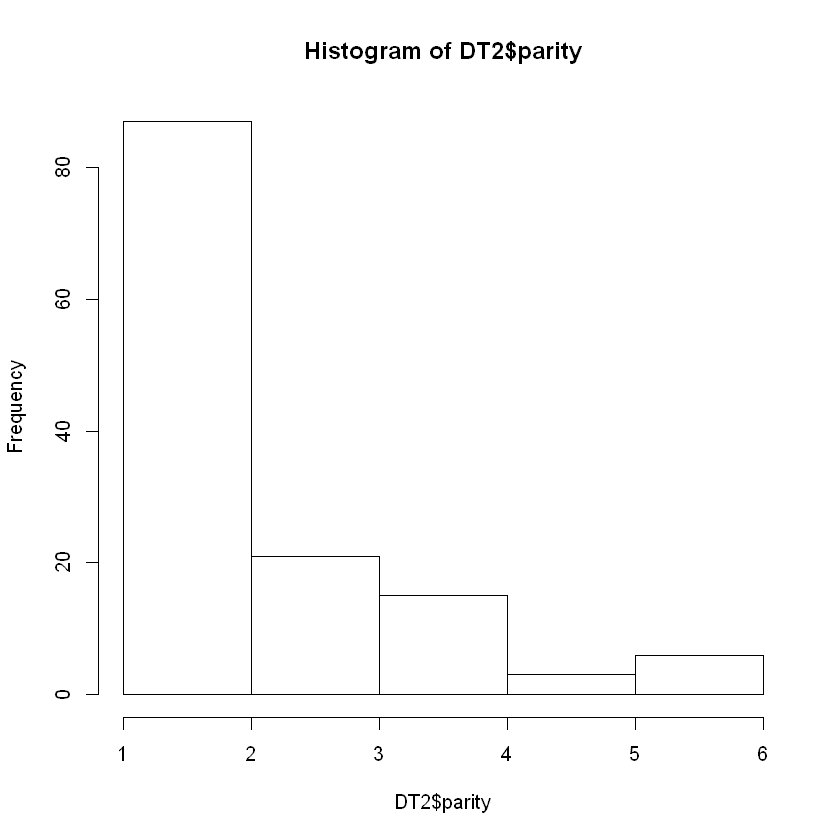

In [140]:
#DT2 was our dataset of people with less than a high school education
hist(DT2$parity, breaks=6)

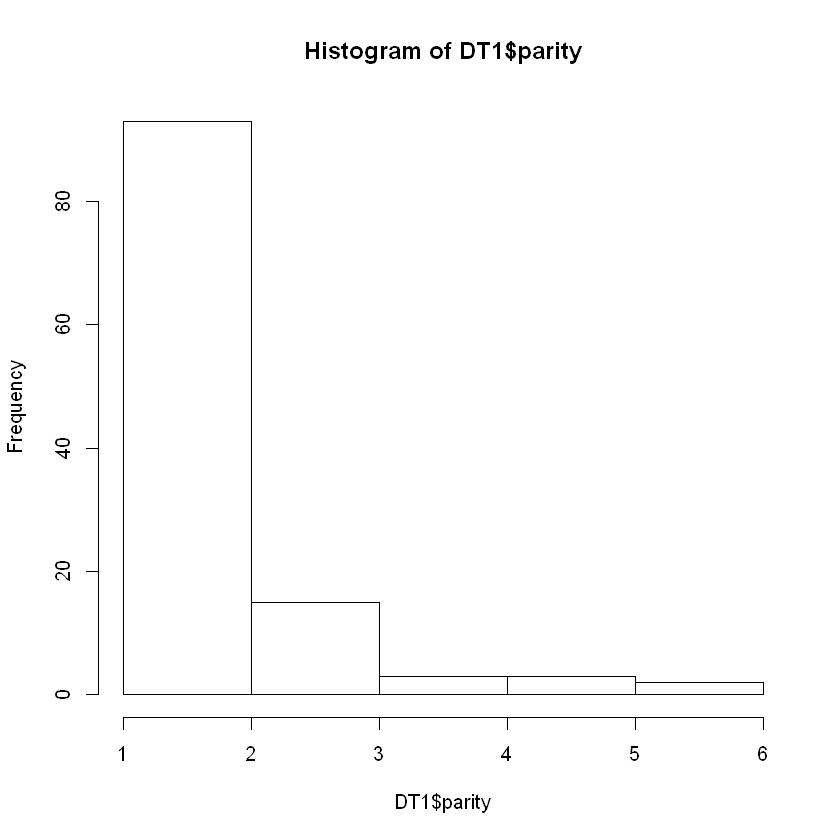

In [141]:
#DT1 was education 12+ years, we see that there is a lower frequency of having more than 2 full "parity" births 

hist(DT1$parity, breaks=6)

In [148]:
t.test((DT1$parity),
+ (DT2$parity))


	Welch Two Sample t-test

data:  (DT1$parity) and +(DT2$parity)
t = -2.7938, df = 244.57, p-value = 0.005621
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7389301 -0.1278410
sample estimates:
mean of x mean of y 
 1.862069  2.295455 


In [ ]:
#t.test proves this hypothesis that the number of parity births of highschool educated women to 
#women with less education are significantly different with a p value lower than .05

In [108]:
require(stats)
model1 <- glm(case ~ spontaneous+induced, data = infert, family = binomial())
summary(model1)
## adjusted for other potential confounders:
summary(model2 <- glm(case ~ age+parity+education+spontaneous+induced,
                     data = infert, family = binomial()))
## Really should be analysed by conditional logistic regression
## which is in the survival package
if(require(survival)){
  model3 <- clogit(case ~ spontaneous+induced+strata(stratum), data = infert)
  print(summary(model3))
  detach()  # survival (conflicts)
}


Call:
glm(formula = case ~ spontaneous + induced, family = binomial(), 
    data = infert)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6678  -0.8360  -0.5772   0.9030   1.9362  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.7079     0.2677  -6.380 1.78e-10 ***
spontaneous   1.1972     0.2116   5.657 1.54e-08 ***
induced       0.4181     0.2056   2.033    0.042 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 316.17  on 247  degrees of freedom
Residual deviance: 279.61  on 245  degrees of freedom
AIC: 285.61

Number of Fisher Scoring iterations: 4



Call:
glm(formula = case ~ age + parity + education + spontaneous + 
    induced, family = binomial(), data = infert)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7603  -0.8162  -0.4956   0.8349   2.6536  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.14924    1.41220  -0.814   0.4158    
age               0.03958    0.03120   1.269   0.2046    
parity           -0.82828    0.19649  -4.215 2.49e-05 ***
education6-11yrs -1.04424    0.79255  -1.318   0.1876    
education12+ yrs -1.40321    0.83416  -1.682   0.0925 .  
spontaneous       2.04591    0.31016   6.596 4.21e-11 ***
induced           1.28876    0.30146   4.275 1.91e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 316.17  on 247  degrees of freedom
Residual deviance: 257.80  on 241  degrees of freedom
AIC: 271.8

Number of Fisher Scoring iterations: 4


Loading required package: survival


Call:
coxph(formula = Surv(rep(1, 248L), case) ~ spontaneous + induced + 
    strata(stratum), data = infert, method = "exact")

  n= 248, number of events= 83 

              coef exp(coef) se(coef)     z Pr(>|z|)    
spontaneous 1.9859    7.2854   0.3524 5.635 1.75e-08 ***
induced     1.4090    4.0919   0.3607 3.906 9.38e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            exp(coef) exp(-coef) lower .95 upper .95
spontaneous     7.285     0.1373     3.651    14.536
induced         4.092     0.2444     2.018     8.298

Rsquare= 0.193   (max possible= 0.519 )
Likelihood ratio test= 53.15  on 2 df,   p=2.869e-12
Wald test            = 31.84  on 2 df,   p=1.221e-07
Score (logrank) test = 48.44  on 2 df,   p=3.032e-11



ERROR: Error in parse(text = x, srcfile = src): <text>:3:32: unexpected symbol
2: 
3: f = ans[ans['infert'] == 'age'].plot
                                  ^
